In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Load the CSV file
df = pd.read_csv("data/fish_datasheet.csv")


In [8]:
# Relevant columns for NH_df
NH_columns = ["Name", "NH Jan", "NH Feb", "NH Mar", "NH Apr", "NH May", "NH Jun", 
              "NH Jul", "NH Aug", "NH Sep", "NH Oct", "NH Nov", "NH Dec"]
NH_df = df[NH_columns].copy()

print("NH_df:")
NH_df.head()

NH_df:


,Name,NH Jan,NH Feb,NH Mar,NH Apr,NH May,NH Jun,NH Jul,NH Aug,NH Sep,NH Oct,NH Nov,NH Dec
0,anchovy,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM
1,angelfish,NaN,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN
2,arapaima,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN
3,arowana,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN
4,barred knifejaw,NaN,NaN,All day,All day,All day,All day,All day,All day,All day,All day,All day,NaN


In [9]:
# Relevant columns for SH_df
SH_columns = ["Name", "SH Jan", "SH Feb", "SH Mar", "SH Apr", "SH May", "SH Jun",
              "SH Jul", "SH Aug", "SH Sep", "SH Oct", "SH Nov", "SH Dec"]
SH_df = df[SH_columns].copy()

print("\nSH_df:")
SH_df.head()


SH_df:


,Name,SH Jan,SH Feb,SH Mar,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec
0,anchovy,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM
1,angelfish,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM,4 PM – 9 AM
2,arapaima,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM
3,arowana,4 PM – 9 AM,4 PM – 9 AM,4 PM – 9 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 PM – 9 AM
4,barred knifejaw,All day,All day,All day,All day,All day,NaN,NaN,NaN,All day,All day,All day,All day


In [ ]:
def plot_spawning_calendar(dataframe, title, filename):
    # Dynamic height based on number of fish
    plt.figure(figsize=(12, len(dataframe) * 0.5))

    # Convert to 1s and NaNs (1 means spawning, NaN means no spawn)
    spawn_data = dataframe.set_index("Name").notna().astype(int)

    # Plot heatmap
    ax = sns.heatmap(spawn_data, cmap="Greens", linewidths=0.5, cbar=False)

    plt.xlabel("Month")
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    plt.ylabel("Fish Species")
    plt.title(title)
    plt.xticks(rotation=45)
    
    plt.savefig(filename, bbox_inches="tight", dpi=300)  # High-resolution save
    plt.show()
    
    plt.close()  # Close figure to prevent overlapping when called multiple times


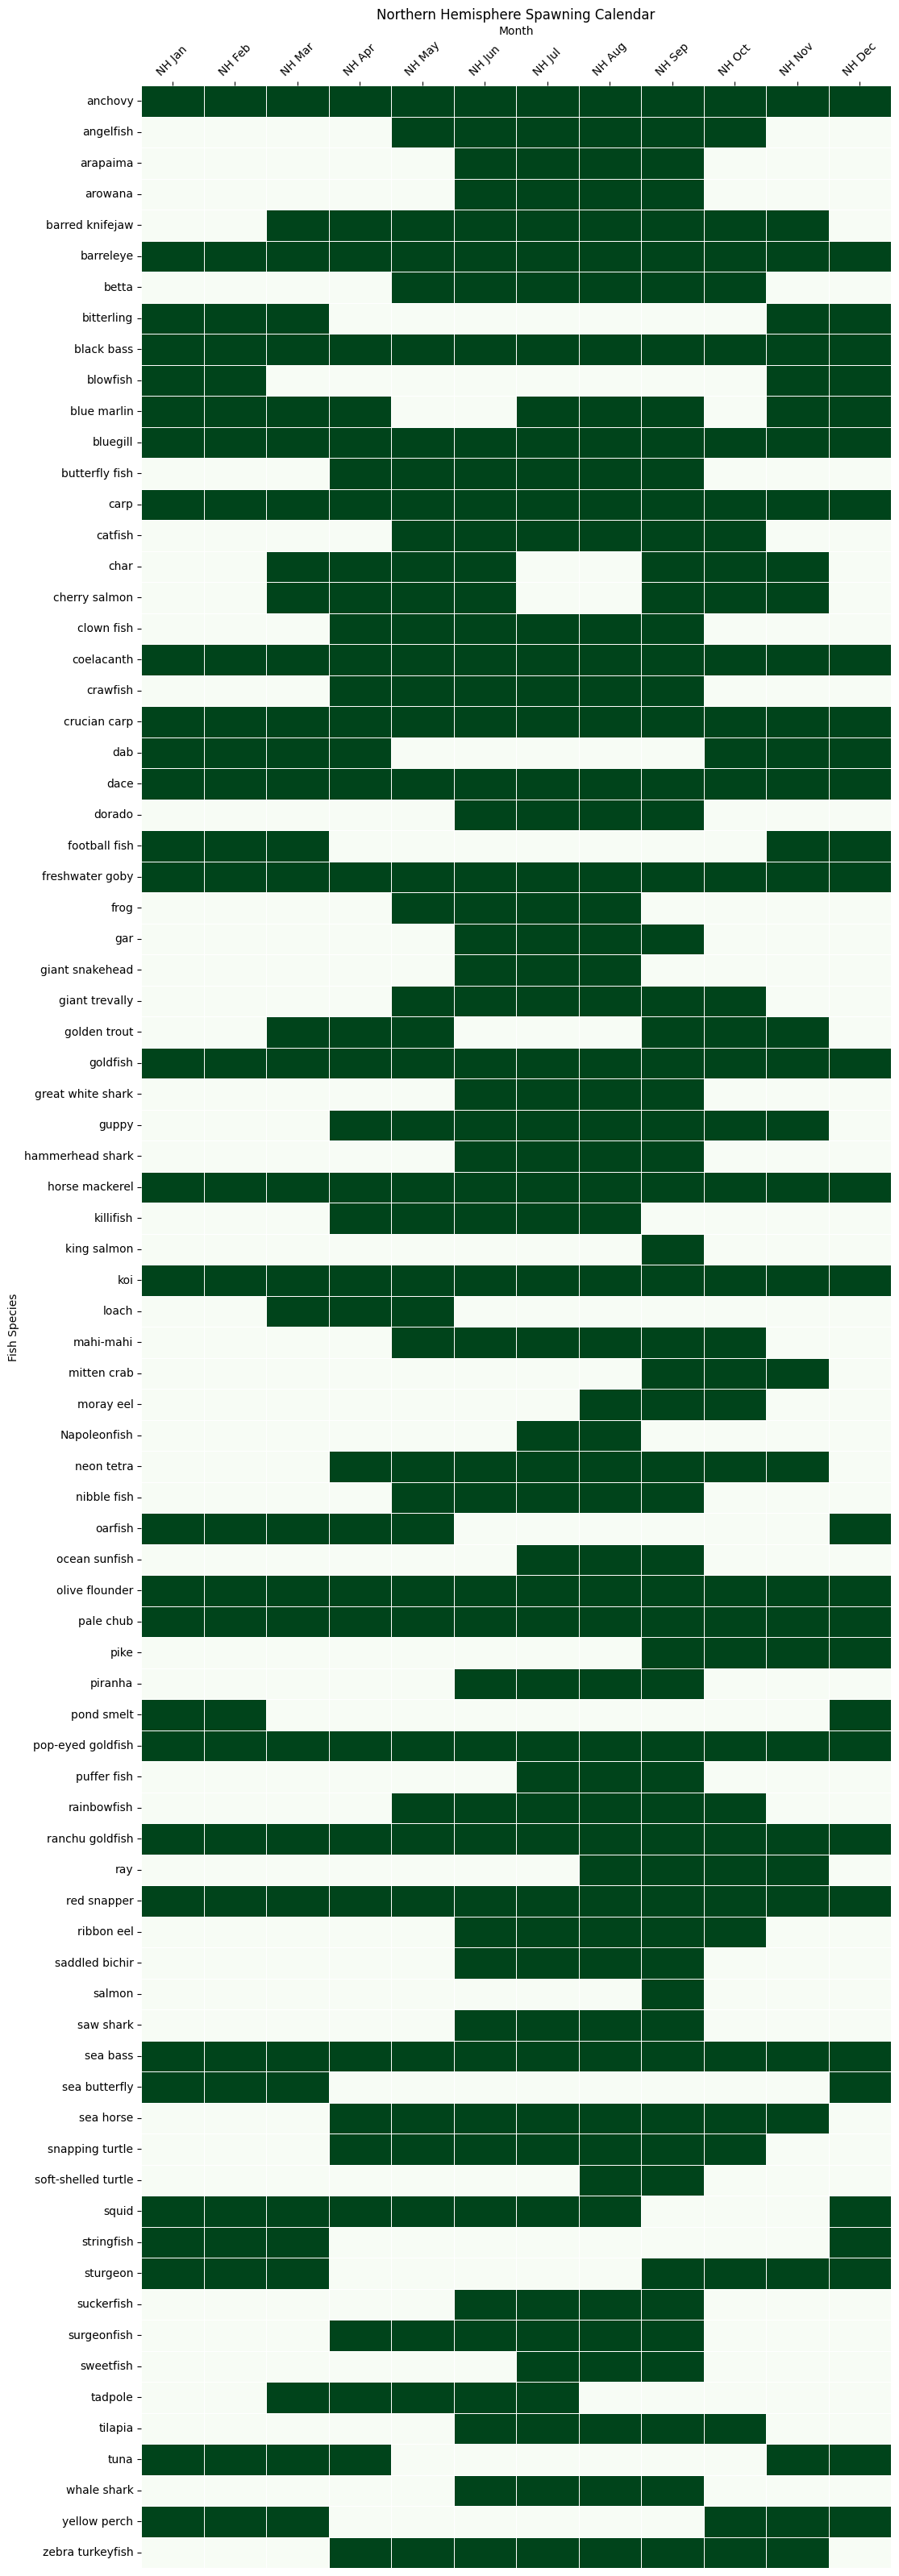

In [20]:
plot_spawning_calendar(NH_df, "Northern Hemisphere Spawning Calendar", "NH_spawning_calendar.png")

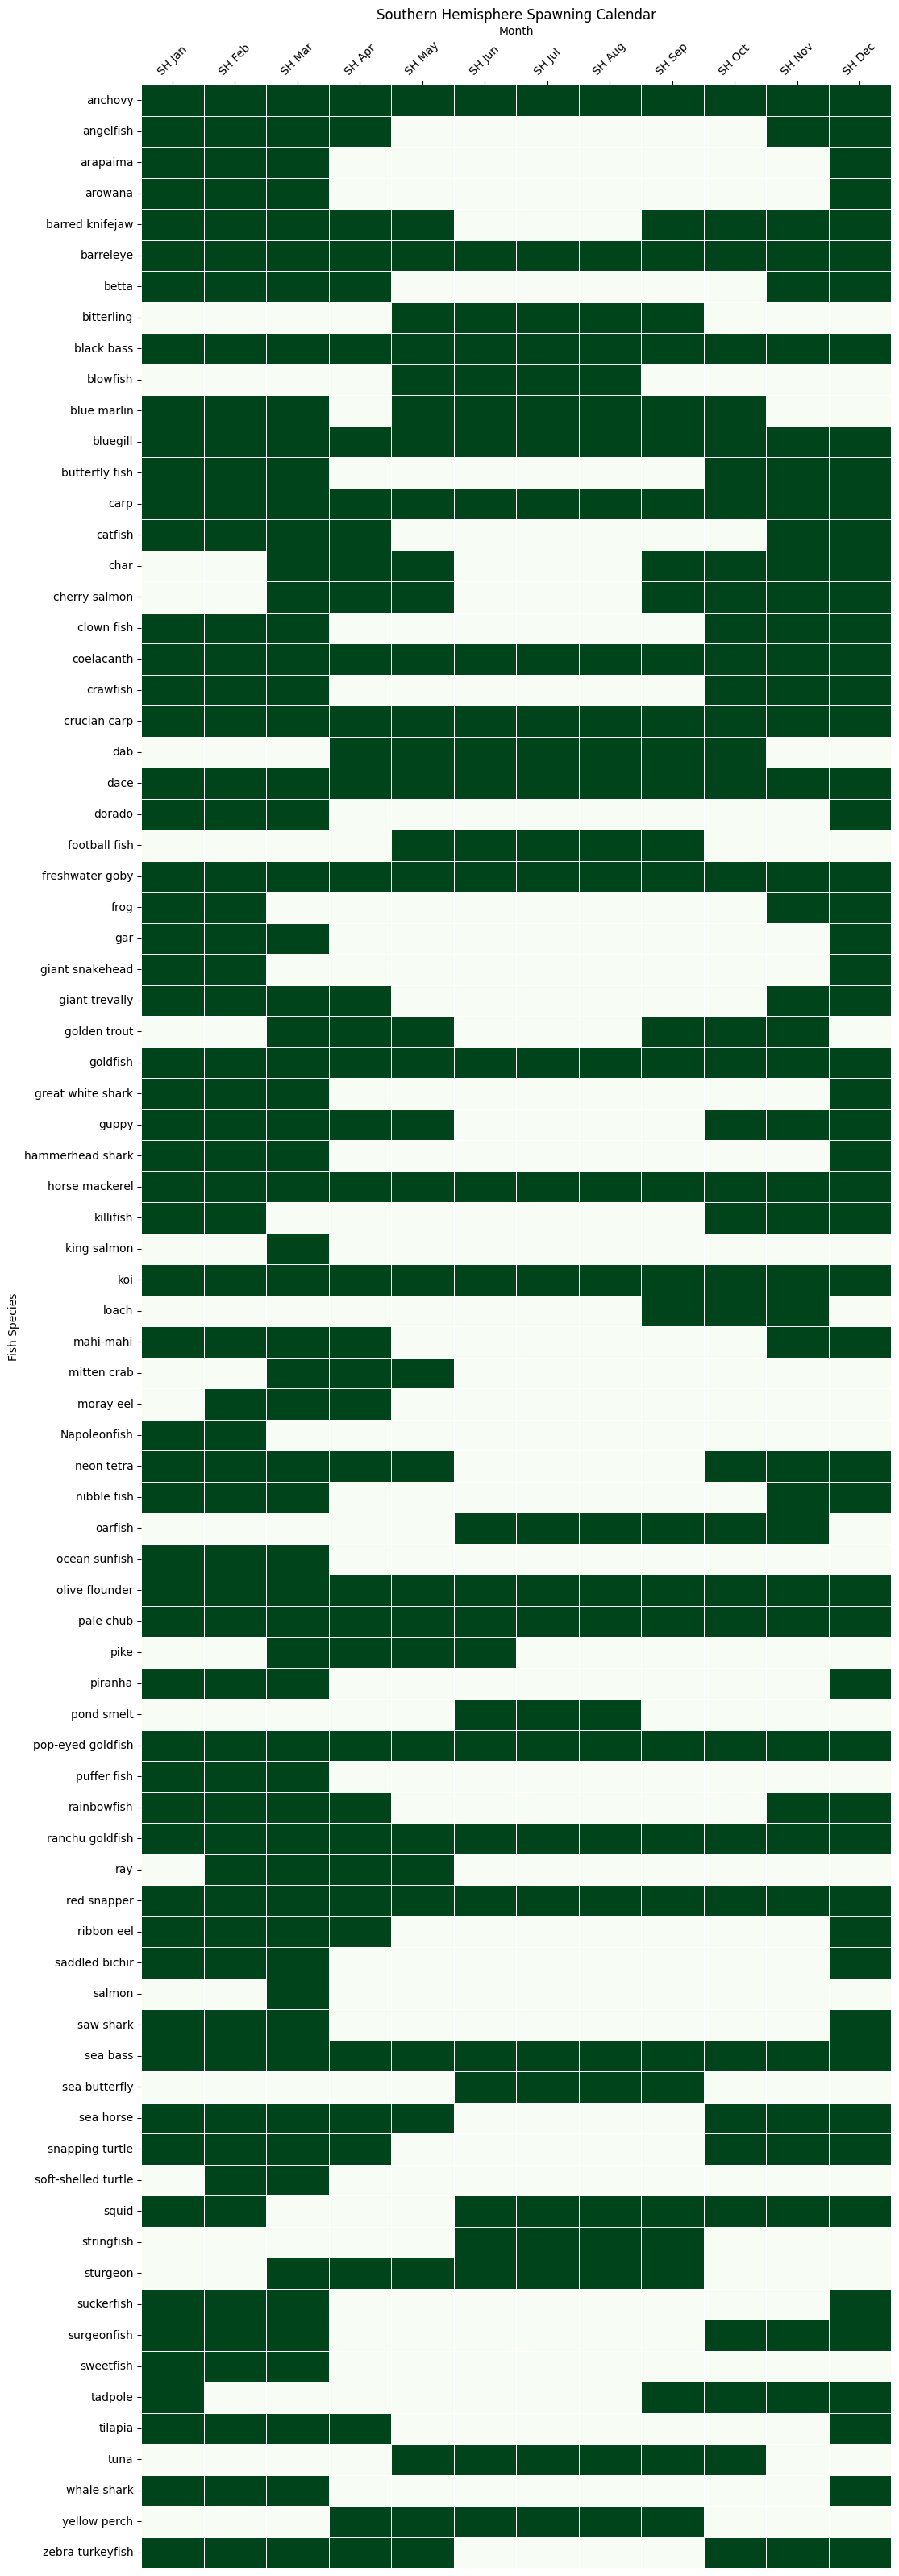

In [21]:
plot_spawning_calendar(SH_df, "Southern Hemisphere Spawning Calendar", "SH_spawning_calendar.png")